In [ ]:
from google.colab import files
uploaded = files.upload()


Saving insurance.csv to insurance.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('insurance.csv')

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.shape

(1338, 7)

In [ ]:
print("The first row count of the data set{}",format(data.shape[0]))

The first row count of the data set{} 1338


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
data.duplicated().sum()

1

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.value_counts()

age  sex     bmi     children  smoker  region     charges    
18   female  20.790  0         no      southeast  1607.51010     1
48   female  27.360  1         no      northeast  9447.38240     1
             25.850  3         yes     southeast  24180.93350    1
             22.800  0         no      southwest  8269.04400     1
47   male    47.520  1         no      southeast  8083.91980     1
                                                                ..
31   female  25.740  0         no      southeast  3756.62160     1
             23.600  2         no      southwest  4931.64700     1
             21.755  0         no      northwest  4134.08245     1
30   male    44.220  2         no      southeast  4266.16580     1
64   male    40.480  0         no      southeast  13831.11520    1
Name: count, Length: 1337, dtype: int64

In [ ]:
data.value_counts("sex")

sex
male      675
female    662
Name: count, dtype: int64

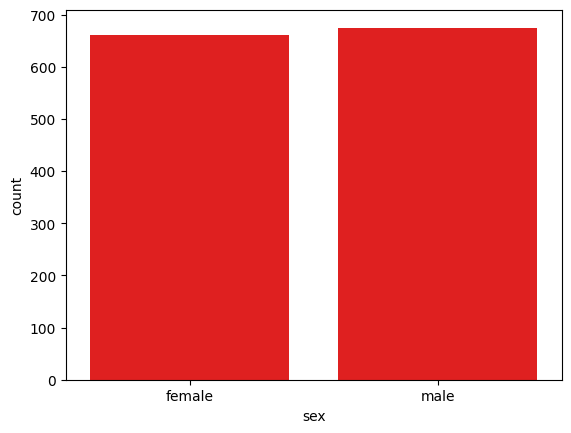

In [ ]:
sns.countplot(x="sex",data=data, color = "r")
plt.show()

In [ ]:
data.value_counts("smoker")

smoker
no     1063
yes     274
Name: count, dtype: int64

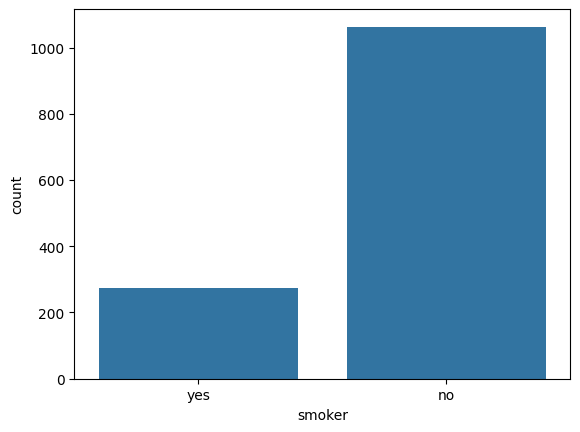

In [ ]:
sns.countplot(x="smoker",data=data)
plt.show()

In [ ]:
data.value_counts("region")

region
southeast    364
southwest    325
northeast    324
northwest    324
Name: count, dtype: int64

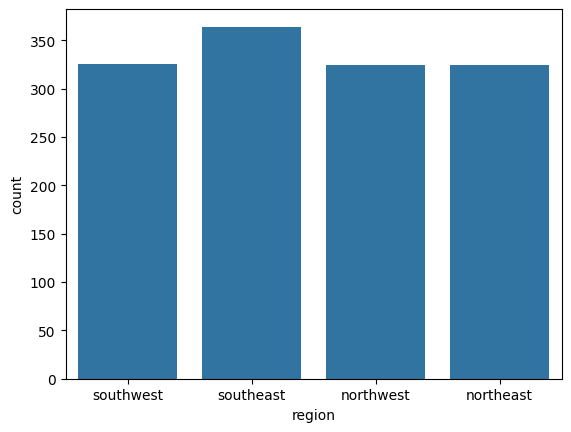

In [ ]:
sns.countplot(x="region",data = data)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

In [ ]:
Labelencoder = LabelEncoder()

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
data["sex"] = Labelencoder.fit_transform(data["sex"])
data["smoker"] = Labelencoder.fit_transform(data["smoker"])
data["region"] = Labelencoder.fit_transform(data["region"])

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [ ]:
data.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.019814,0.109344,0.041536,-0.025587,0.001626,0.298308
sex,-0.019814,1.000000,0.046397,0.017848,0.076596,0.004936,0.058044
bmi,0.109344,0.046397,1.000000,0.012755,0.003746,0.157574,0.198401
children,0.041536,0.017848,0.012755,1.000000,0.007331,0.016258,0.067389
smoker,-0.025587,0.076596,0.003746,0.007331,1.000000,-0.002358,0.787234
region,0.001626,0.004936,0.157574,0.016258,-0.002358,1.000000,-0.006547
charges,0.298308,0.058044,0.198401,0.067389,0.787234,-0.006547,1.000000


In [ ]:
data.corr()["charges"].sort_values(ascending=False)

charges     1.000000
smoker      0.787234
age         0.298308
bmi         0.198401
children    0.067389
sex         0.058044
region     -0.006547
Name: charges, dtype: float64

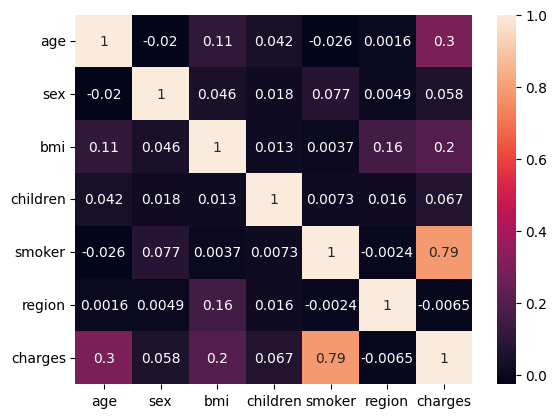

In [ ]:
sns.heatmap(data.corr(),annot=True)
plt.show()

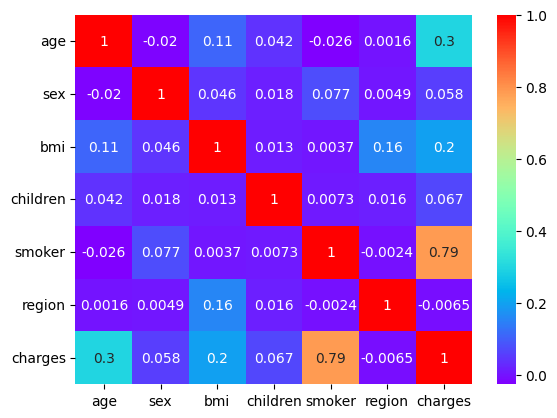

In [ ]:
sns.heatmap(data.corr(),annot=True, cmap="rainbow");

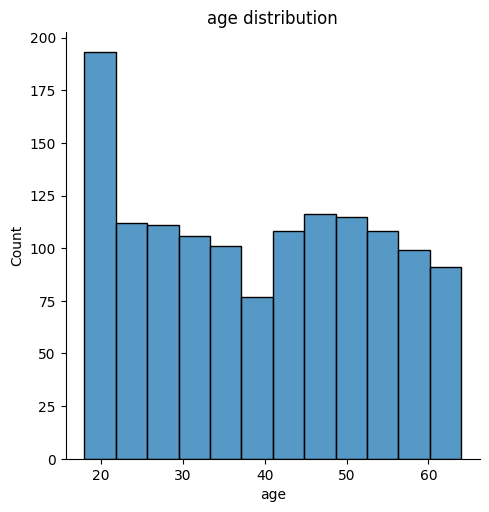

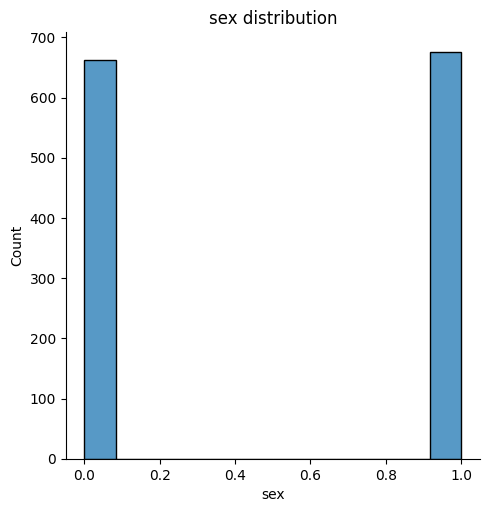

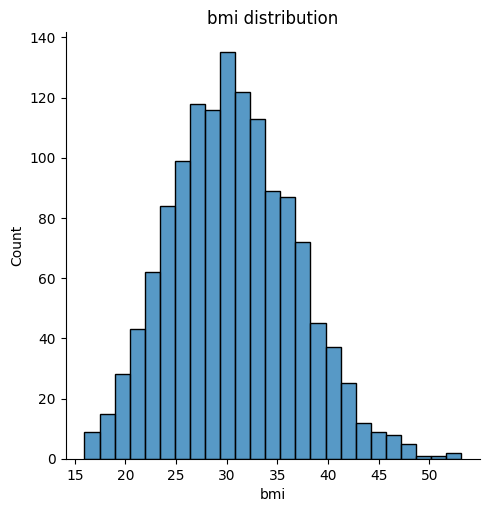

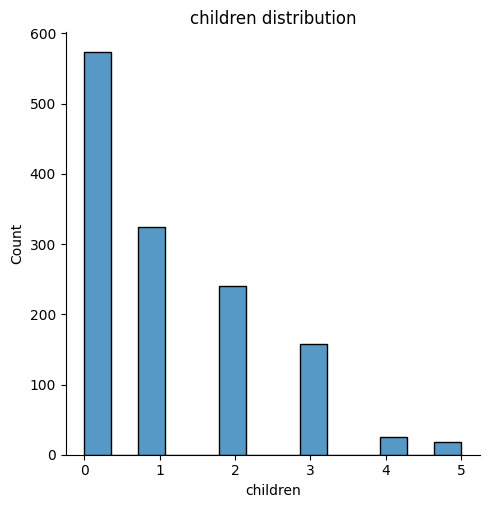

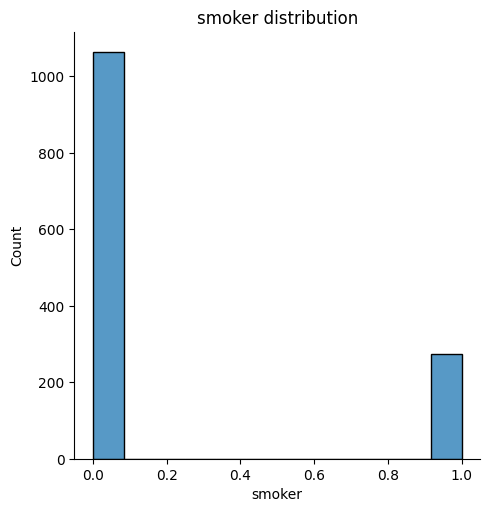

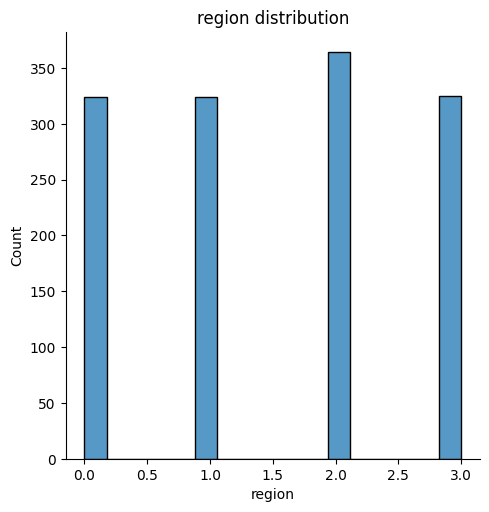

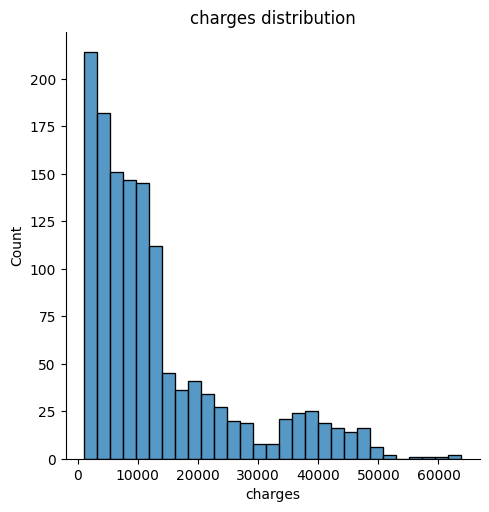

In [ ]:
for i in data.columns:
  sns.displot(x=data[i])
  plt.title(i + " " + "distribution")
  plt.show()

In [ ]:
colorsforx = ["red","green","yellow","black", "blue", "grey"]
colorschanger = 0

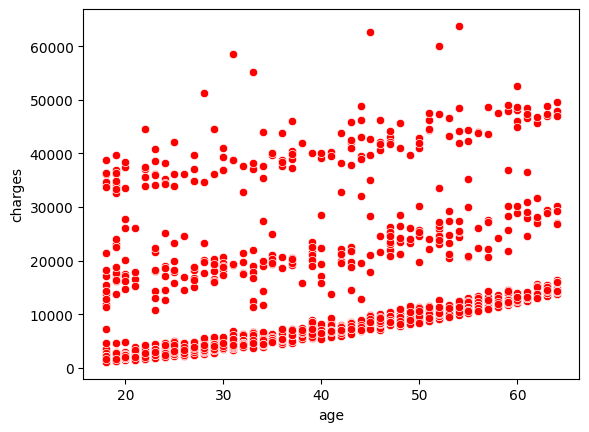

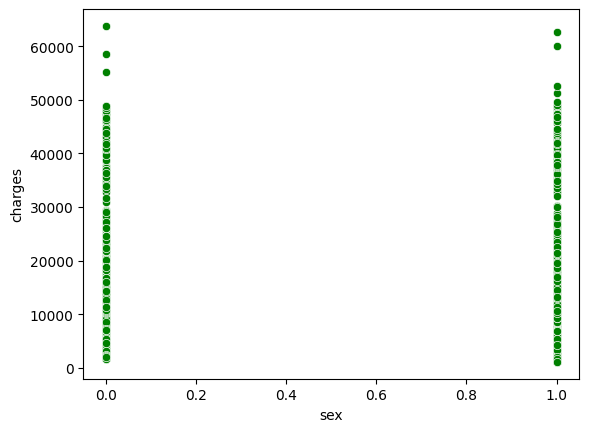

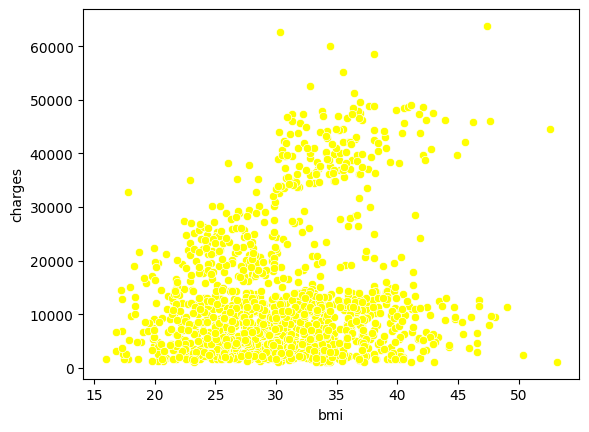

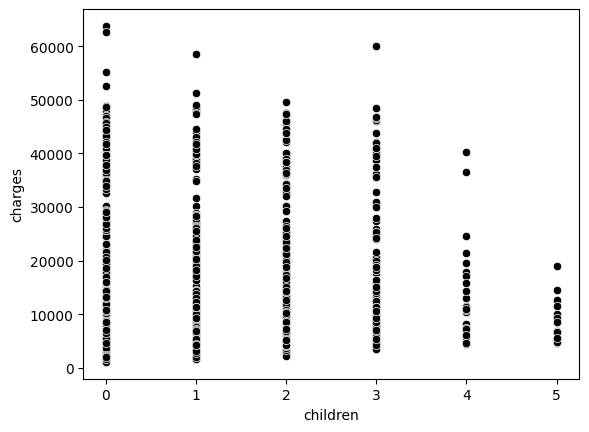

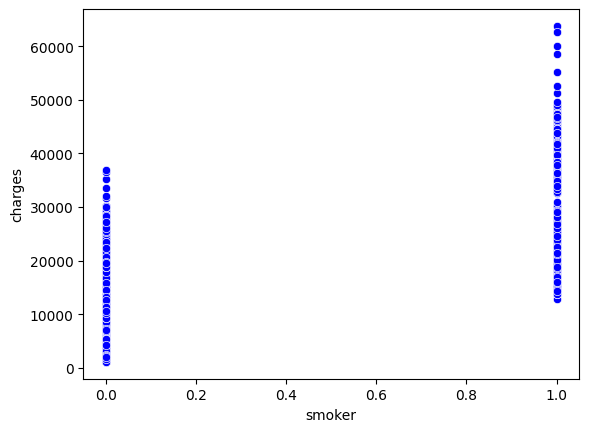

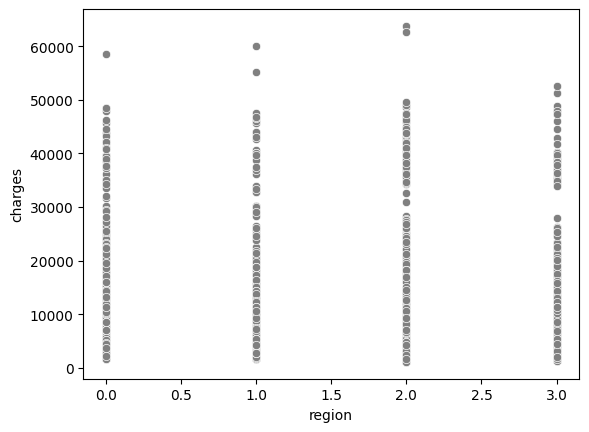

In [ ]:
for i in data.columns[:-1]:
  sns.scatterplot(data=data, x=i, y="charges", color=colorsforx[colorschanger])


  plt.show()

  colorschanger += 1

In [ ]:
x = data[["age", "sex", "bmi", "children","smoker", "region"]]
y = data["charges"]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size=0.30)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
def modelresults(predictions):
  print("Mean absolute error on model is {}".format(mean_absolute_error(y_test,predictions)))
  print("Mean squared error on model is {}".format(np.sqrt(mean_squared_error(y_test,predictions))))


In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(scaled_x_train, y_train)

LinearRegression()

In [ ]:
predslr = lr.predict(scaled_x_test)
modelresults(predslr)

Mean absolute error on model is 3982.080463628873
Mean squared error on model is 5746.836203412118


In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [ ]:
svrmodel = SVR()
param_gridsvr = {"C":[0.001, 0.01, 0.1, 0.5, 1.0],
                 "kernel": ["linear", "rbf", "poly"],
                 "gamma":["scale", "auto"],
                 "degree":[2,3,4,5]}
gridsvr = GridSearchCV(svrmodel, param_gridsvr)
gridsvr.fit(scaled_x_train, y_train)
print("Best parameters for model is {}".format(gridsvr.best_params_))

Best parameters for model is {'C': 1.0, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}


In [ ]:
predsgridsvr= gridsvr.predict(scaled_x_test)
modelresults(predsgridsvr)

Mean absolute error on model is 7795.577927225288
Mean squared error on model is 11862.070577333703


In [ ]:
from  sklearn.ensemble import RandomForestRegressor
rfrmodel = RandomForestRegressor()
param_gridrfr= {"bootstrap": [True],
                 "max_depth": [5,10,15],
                 "max_features": ["auto", "log2"],
                 "n_estimators" : [2,3,4,5,6,7,8,9,10]}
gridrfr= GridSearchCV(rfrmodel, param_gridrfr)
gridrfr.fit(scaled_x_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, 15],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [ ]:
predsgridrfr = gridrfr.predict(scaled_x_test)
modelresults(predsgridrfr)

Mean absolute error on model is 2383.753139332654
Mean squared error on model is 4378.022202344697


In [ ]:
x.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')

In [ ]:
columniterate = 1
for index in x.columns:
  mean = data[index].mean()
  print("The mean of the column {} is {}".format(columniterate, mean))

The mean of the column 1 is 39.222139117427076
The mean of the column 1 is 0.5048616305160808
The mean of the column 1 is 30.66345175766642
The mean of the column 1 is 1.0957367240089753
The mean of the column 1 is 0.2049364248317128
The mean of the column 1 is 1.5160807778608825


In [ ]:
new_customer = np.array([39, 0, 30, 1, 0, 1])

In [ ]:
gridrfr.predict(new_customer.reshape(1,-1))

array([15159.50901517])

In [ ]:
print("The Insurance cost of new customer is {}".format(gridrfr.predict(new_customer.reshape(1,-1))[0]))

The Insurance cost of new customer is 15159.509015174895
